In [888]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [889]:
data = pd.read_csv('data.csv')

## Подготовка данных

In [890]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Смотрим сколько признаков имеют пропуски в даннх

In [891]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [892]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Определяем таргет

In [893]:
target=data['Item_Outlet_Sales']

Записываем индификаторы для вывода ответа

In [894]:
id_item=data['Item_Identifier']
id_item.shape

(8523,)

Убираем колонку с индификаторами и таргетом из датасета

In [895]:
X=data.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)

In [896]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [897]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 665.9+ KB


Заполняем средними занчениями пустые данные колонки Item_Weight

In [898]:
X.Item_Weight.fillna(X.Item_Weight.median(), inplace=True)

Еще не хватает данных в Outlet_Size, но так как это категориальный признак используем на нем get_dummies

In [899]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 665.9+ KB


In [900]:
#X=X.drop(['Outlet_Establishment_Year'], axis=1)

In [901]:
X=pd.get_dummies(X, columns=["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", 'Outlet_Establishment_Year'])

In [902]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 53 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Item_Fat_Content_LF                8523 non-null uint8
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Ty

Убираем Item_Outlet_Sales т.к он является таргетом

In [962]:
X.to_csv('start_data.csv',index=0) #сохроняем датасет

In [904]:
from sklearn.model_selection import train_test_split


Делим выборку на трейн и тест

In [905]:
X_train, X_test, y_train, y_test, X_id, y_id = train_test_split(X, target, id_item, test_size=0.2, random_state= 15)

In [906]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
4896,8.365,0.039925,189.2188,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,18.500,0.045464,144.1102,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6294,7.825,0.079614,65.0826,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
231,12.600,0.139561,170.4764,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
5107,8.880,0.086781,152.2682,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [907]:
X_train.shape

(6818, 53)

In [908]:
X_test.shape

(1705, 53)

In [909]:
y_train.shape

(6818,)

In [910]:
y_test.shape

(1705,)

In [911]:
X_id.shape

(6818,)

In [912]:
y_id.shape

(1705,)

## Постоение моделей

### Для начала попробуем на линейной регрессии

In [913]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)


In [914]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [915]:
y_pred=lr.predict(X_test)

Подключаем метрики

In [916]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [917]:
R2_lr=r2_score(y_test, y_pred)
R2_lr

0.5680853664388232

In [918]:
MAE_lr=mean_absolute_error(y_test, y_pred)
MAE_lr

863.3762426996072

In [919]:
MSE_lr=mean_squared_error(y_test, y_pred)
MSE_lr

1392274.8793992593

Резельтат не очень, попробуем улучшить использую GridSearchCV с RandomForestRegressor

In [920]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

Выбираем параметры для перебора

In [921]:
params = {
    'n_estimators': [5, 10, 20],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [922]:
grid =GridSearchCV(rf, params, cv=10)

In [923]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, N

In [924]:
y_pred_rf=grid.predict(X_test)

Смотрим результат

In [925]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10}
0.5923439843159036
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


Результат стал лучше

In [926]:
R2_rf=r2_score(y_test, y_pred_rf)
R2_rf

0.6083967914999362

In [927]:
MSE_rf=mean_squared_error(y_test, y_pred_rf)
MSE_rf

1262331.181954649

In [928]:
MAE_rf=mean_absolute_error(y_test, y_pred_rf)
MAE_rf

779.3513892828715

### Найдем feature_importances

Будем использовать лучшие параметры Grid

In [929]:
params=grid.best_params_

In [930]:
params

{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 10}

In [931]:
rf_one=RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_leaf=params['min_samples_leaf'])

In [932]:
rf_one.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [933]:
feat_imp=rf_one.feature_importances_


In [934]:
col=X_train.columns

In [935]:
for i in range(0, len(feat_imp)):
    print(col[i],feat_imp[i])

Item_Weight 0.000650100880853736
Item_Visibility 0.0013189767285582857
Item_MRP 0.5459457943177302
Item_Fat_Content_LF 0.0
Item_Fat_Content_Low Fat 3.266387364617518e-06
Item_Fat_Content_Regular 7.359997499130077e-05
Item_Fat_Content_low fat 0.0
Item_Fat_Content_reg 3.0343757667592397e-05
Item_Type_Baking Goods 6.890209589541111e-06
Item_Type_Breads 5.954728745679028e-06
Item_Type_Breakfast 9.847030772011747e-06
Item_Type_Canned 0.0
Item_Type_Dairy 0.000469662112842854
Item_Type_Frozen Foods 0.0
Item_Type_Fruits and Vegetables 0.00021830444826936063
Item_Type_Hard Drinks 2.0870863380931314e-06
Item_Type_Health and Hygiene 0.0004545118934097029
Item_Type_Household 0.0005186636202736417
Item_Type_Meat 7.174297781343881e-06
Item_Type_Others 0.0
Item_Type_Seafood 0.0
Item_Type_Snack Foods 0.0
Item_Type_Soft Drinks 0.0002973567270202893
Item_Type_Starchy Foods 2.463444215620002e-06
Outlet_Identifier_OUT010 6.475652937975176e-07
Outlet_Identifier_OUT013 0.0
Outlet_Identifier_OUT017 0.0
Outle

Выводим признаки отсортированные по feature_importances

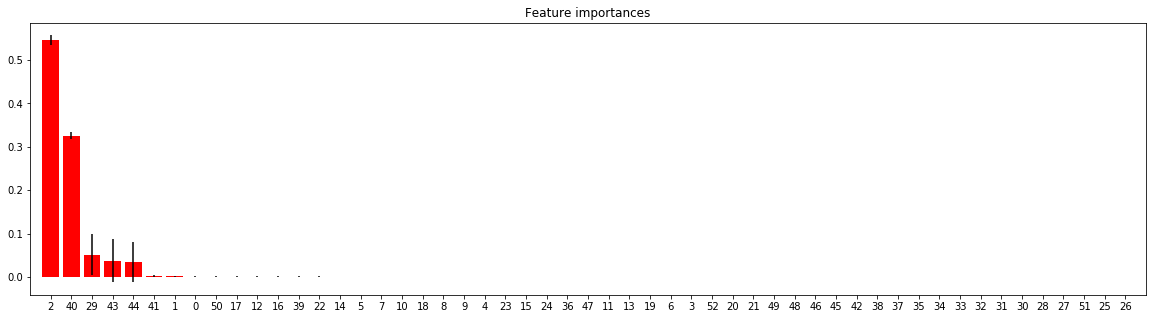

In [936]:
importances = rf_one.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rf_one.estimators_], axis=0) 
indices = np.argsort(importances)[::-1] # Print the feature ranking #print("Feature ranking:") # Plot the feature importances of the forest 
plt.figure(figsize=(20,5)) 
plt.title("Feature importances") 
plt.bar(range(X_train[col].shape[1]), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xticks(range(X_train[col].shape[1]), indices) 
plt.xlim([-1, X_train[col].shape[1]]) 
plt.show() 

Попробуем построить модель на первых 10 наиболее важных  признаках

In [937]:
indices[:10]

array([ 2, 40, 29, 43, 44, 41,  1,  0, 50, 17], dtype=int64)

In [938]:
feat=indices[:10]

In [939]:
name_col=[]
for j in range(0, len(feat)):
    name_col.append(col[feat[j]])
name_col

['Item_MRP',
 'Outlet_Type_Grocery Store',
 'Outlet_Identifier_OUT027',
 'Outlet_Type_Supermarket Type3',
 'Outlet_Establishment_Year_1985',
 'Outlet_Type_Supermarket Type1',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year_2004',
 'Item_Type_Household']

In [940]:
X_new=X_train[name_col]
X_test_new=X_test[name_col]

In [941]:
X_new.shape

(6818, 10)

In [942]:
rf_new=RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_leaf=params['min_samples_leaf'])
rf_new.fit(X_new, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [943]:
y_pred_rf_new=rf_new.predict(X_test_new)

In [944]:
R2_rf_new=r2_score(y_test, y_pred_rf_new)
R2_rf_new

0.6062938923229053

In [945]:
MSE_rf_new=mean_squared_error(y_test, y_pred_rf_new)
MSE_rf_new

1269109.8679971881

In [946]:
MAE_rf_new=mean_absolute_error(y_test, y_pred_rf_new)
MAE_rf_new

781.9903290984201

### И попробуем еще KNN для сравнения результатов

In [947]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [948]:
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [949]:
grid_knn = GridSearchCV(knn, knn_params, cv=10)

In [950]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [951]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
0.5522886121315368
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                    weights='uniform')


In [952]:
y_pred_knn=grid_knn.predict(X_test)

In [953]:
MSE_knn=mean_squared_error(y_test, y_pred_knn)
MSE_knn

1459304.8679189996

In [954]:
R2_knn=r2_score(y_test, y_pred_knn)
R2_knn

0.5472911731674448

In [955]:
MAE_knn=mean_absolute_error(y_test, y_pred_knn)
MAE_knn

837.1340085500163

### Сравним результаты:

In [956]:
print('MSE: {} R2: {} MAE: {} Линейная регрессия '.format(MSE_lr, R2_lr, MAE_lr))
print('MSE: {} R2: {} MAE: {} Случайный лес на всех данных '.format(MSE_rf, R2_rf, MAE_rf))
print('MSE: {} R2: {} MAE: {} Случайный лес на выбранных данных '.format(MSE_rf_new, R2_rf_new, MAE_rf_new))
print('MSE: {} R2: {} MAE: {} Метод ближайших соседей '.format(MSE_knn, R2_knn, MAE_knn))

MSE: 1392274.8793992593 R2: 0.5680853664388232 MAE: 863.3762426996072 Линейная регрессия 
MSE: 1262331.181954649 R2: 0.6083967914999362 MAE: 779.3513892828715 Случайный лес на всех данных 
MSE: 1269109.8679971881 R2: 0.6062938923229053 MAE: 781.9903290984201 Случайный лес на выбранных данных 
MSE: 1459304.8679189996 R2: 0.5472911731674448 MAE: 837.1340085500163 Метод ближайших соседей 


Видим что случайный лес дал лучшее показатели (выбор данных практически не изменил финальную картину)

In [957]:
X_test['Item_Outlet_Sales']=y_pred_rf

C:\Users\663806\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [958]:
X_test['Item_Identifier']=y_id

C:\Users\663806\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [959]:
data_frame= X_test[['Item_Identifier','Item_Outlet_Sales']]

In [960]:
data_frame

,Item_Identifier,Item_Outlet_Sales
1417,FDV39,3042.425597
5066,FDB32,1465.610964
8374,FDW25,1429.132832
2125,DRE27,1539.546593
1810,DRK11,2503.303245
5908,FDV36,280.566530
8261,FDI38,609.810798
7517,FDY01,1994.486299
8167,DRQ35,2054.805387
6468,FDH26,2054.805387


In [961]:
data_frame.to_csv('finish.csv',index=0)